# Exemplo de programa para capturar as formas de onda do osciloscópio

## 1.Inicialização

In [5]:
'''importa as bibliotecas necessárias'''
import pylef   # importar pylef 
import visa    # importar a bilioteca pyVISA para lidar com virtualização de instrumentos
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
# próxima linha faz plotar o gráfico dentro do notebook
%matplotlib inline   

In [6]:
# imprime os recursos para ter certeza que os instrumentos estão conectados
visa.ResourceManager().list_resources()

('USB0::0x0699::0x03B0::C011192::INSTR',
 'USB0::0xF4ED::0xEE3A::388A15157::INSTR')

In [7]:
'''Inicializa classes para controlar instrumentos'''
scope = pylef.TektronixTBS1062()   # definição do osciloscópio

Osciloscópio conectado! Id = TEKTRONIX,TBS 1062,C011192,CF:91.1CT FV:v26.01


## 2. Captura das ondas do osciloscópio
<span style='color:red'>Você deverá configurar manualmente o gerador de funções e as escalas (horizontais e verticais) do osciloscópio.

* <span style='color:red'>Anote o nome do arquivo salvo em seu caderno, e todos os parâmetros relevantes que correspondem ao arquivo</span>
* <span style='color:red'>__Ajuste a amplitude do gerador para 1 $v_{pp}$__ </span>

... file => 2017_09_18\circuito_rc_10_29_02 saved !!


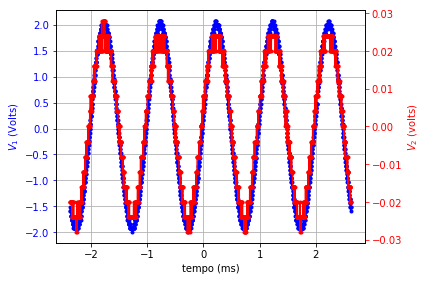

In [8]:
nome_arquivo = 'circuito_rc' #COLOQUE O NOME APROPRIADO AQUI
#capturando os canais e salvando arquivos
t, V1, V2 = scope.save_channels(nome_arquivo, sep = '\t') 
#graficando os dados capturados
#certifique-se que as formas de onda estão de acordo com o esperado!
fig, ax1 = plt.subplots()
#eixo da esquerda
ax1.plot(1e3*t,V1, 'b.-')
ax1.set_xlabel('tempo (ms)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(r'$V_1$ (Volts)', color='b')
ax1.tick_params('y', colors='b')
ax1.grid()
#eixo da direita
ax2 = ax1.twinx()
ax2.plot(1e3*t, V2, 'r.-')
ax2.set_ylabel(r'$V_2$ (volts)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()